In [1]:
%pip install pandas numpy matplotlib seaborn opencv-python tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
# Load necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams['axes.unicode_minus']=False 
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from tensorflow.keras import layers, models
import cv2
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
import random
import os

data_source = 'fall_dataset'

# Data paths
train_img_path = os.path.join(data_source,'images/train/')
train_label_path = os.path.join(data_source,'labels/train/')
val_img_path = os.path.join(data_source,'images/val/')
val_label_path = os.path.join(data_source,'labels/val/')

print(train_img_path)
def load_data(img_path, label_path):
    """
    Load images and corresponding labels from the specified directories.

    Parameters:
    img_path (str): Path to the directory containing image files.
    label_path (str): Path to the directory containing label files.

    Returns:
    images (list): List of image arrays.
    labels (list): List of corresponding labels.
    """
    # Get list of image and label files
    img_files = os.listdir(img_path)
    img_files.sort()  # Sort image files to ensure consistent order
    label_files = os.listdir(label_path)
    label_files.sort()  # Sort label files to ensure consistent order

    images = []
    labels = []

    # Iterate through each image file
    for i in range(len(img_files)):
        # Read the image
        img = plt.imread(img_path + img_files[i])
        
        # Read the corresponding label file
        with open(label_path + label_files[i], 'r') as file:
            r = file.readlines()
        
        bounding_boxes = []
        # Process each line in the label file
        for j in r:
            j = j.split()
            bounding_boxes.append([int(j[0]), float(j[1]), float(j[2]), float(j[3]), float(j[4])])
        
        # Extract each bounding box from the label
        for box in bounding_boxes:
            image_height, image_width, _ = img.shape
            xmin, ymin, width, height = box[1:]
            
            # Convert bounding box coordinates to pixel values
            xmin = int(xmin * image_width)
            ymin = int(ymin * image_height)
            width = int(width * image_width)
            height = int(height * image_height)
            
            # Append the class label and corresponding image region
            labels.append(box[0])
            images.append(img[ymin-height//2:ymin+height//2, xmin-width//2:xmin+width//2])
    
    return images, labels

# usage of the load_data function
train_images, train_labels = load_data(train_img_path, train_label_path)
val_images, val_labels = load_data(val_img_path, val_label_path)

# Preprocess images to the preferred size
pref_size = (128, 128)
def preprocess_images(images):
    for i in range(len(images)):
        images[i] = cv2.resize(images[i], pref_size)
    return np.array(images) / 255.0

# Preprocess train and validation images
X_train = preprocess_images(train_images)
y_train = np.array(train_labels)
X_val = preprocess_images(val_images)
y_val = np.array(val_labels)

fall_dataset\images/train/


In [3]:
if len(np.unique(y_train))==2:
    label_names =  ['Fall Detected', 'NoFall Detected']
else:
    # Mapping of labels to class names
    label_names = ['Fall Detected', 'Walking', 'Sitting']
# label_names =  ['Fall Detected', 'NoFall Detected']
global num_classes
num_classes = len(label_names)

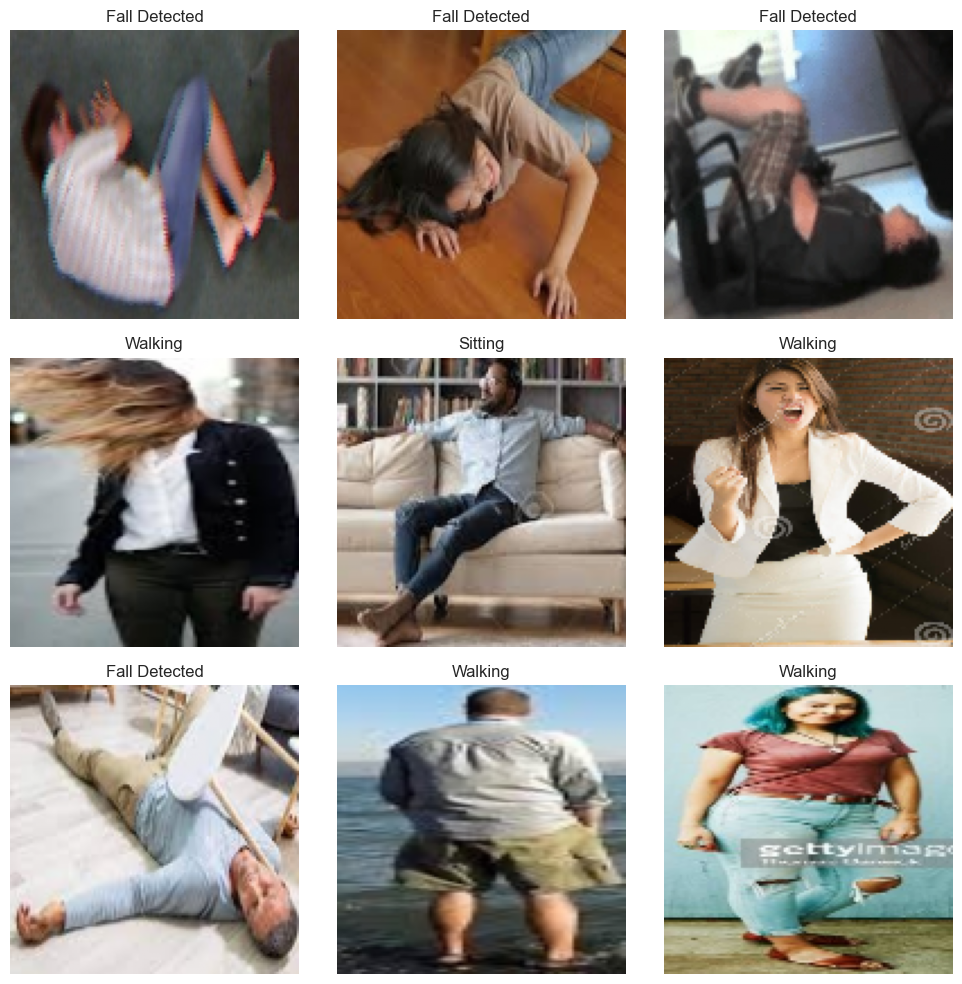

In [4]:
# Function to display random images with labels
def display_random_images(images, labels, num_images=9):
    """
    Display a grid of random images with their corresponding labels.

    Parameters:
    images (array): Array of image data.
    labels (array): Array of labels corresponding to the images.
    num_images (int): Number of images to display. Default is 9.
    """
    plt.figure(figsize=(10, 10))
    
    np.random.seed(3)
    # Generate random indices
    if num_images > len(images):
        num_images = len(images)
    indices = np.random.choice(len(images), num_images, replace=False)
    
    for i, index in enumerate(indices):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[index])
        plt.title(label_names[labels[index]])
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display random images with labels
display_random_images(X_train, y_train)

c:\Users\akhan\Downloads\jio\computerVision\CvProject\cvproject\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training DenseNet201 model...
Restored best model weights
Evaluation...


Saved DenseNet201 model to saved_weights


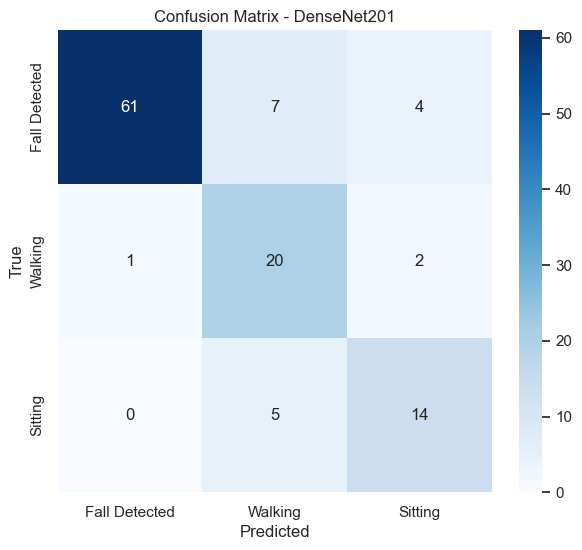

Training ResNet50 model...
Restored best model weights
Evaluation...


c:\Users\akhan\Downloads\jio\computerVision\CvProject\cvproject\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Saved ResNet50 model to saved_weights


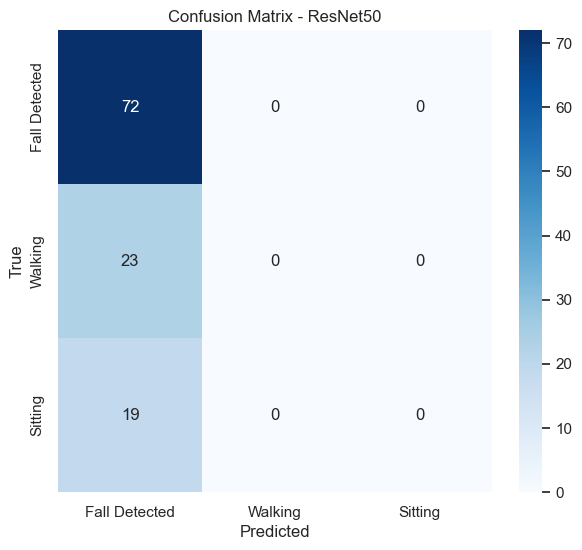

Training VGG19 model...
Restored best model weights
Evaluation...


Saved VGG19 model to saved_weights


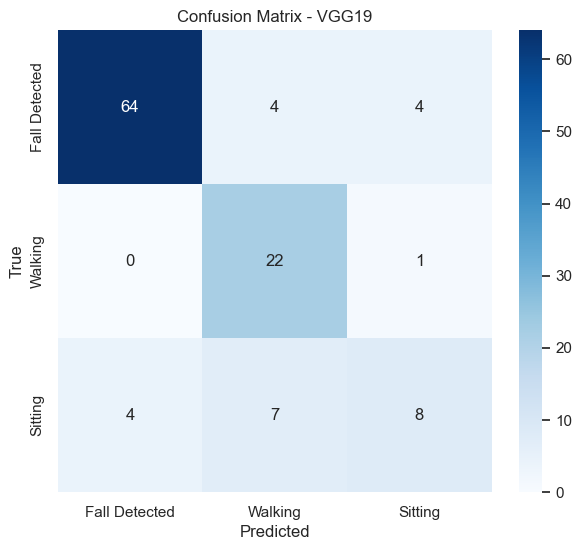

Training InceptionResNetV2 model...
Restored best model weights
Evaluation...


Saved InceptionResNetV2 model to saved_weights


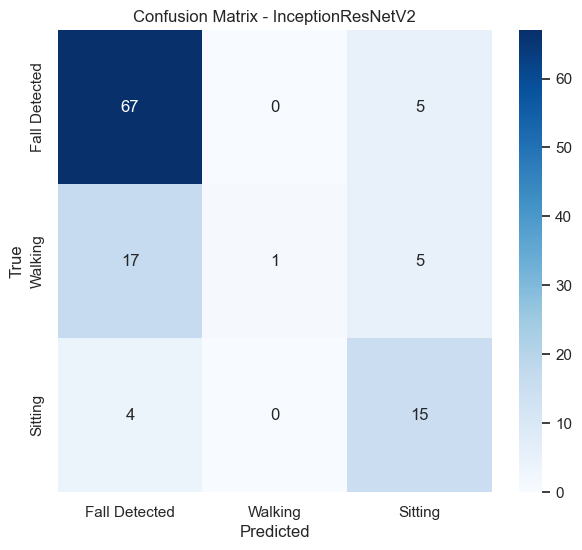

Training CNN model...
Restored best model weights
Evaluation...


c:\Users\akhan\Downloads\jio\computerVision\CvProject\cvproject\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Saved CNN model to saved_weights


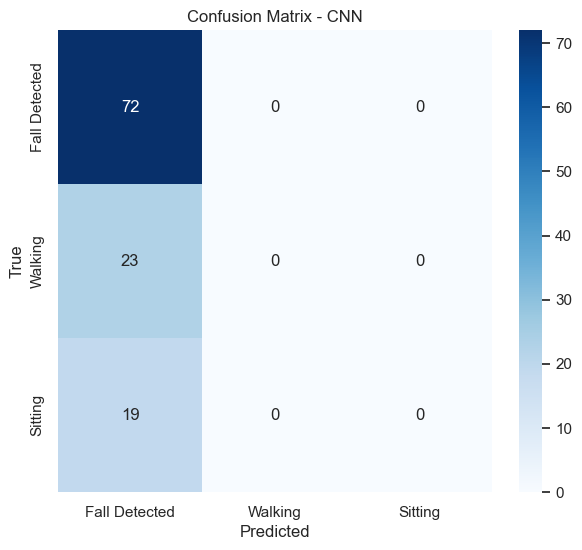

Results for DenseNet201:
Accuracy: 0.8333333333333334
Precision: 0.8641553480475382
Recall: 0.8333333333333334
F1-score: 0.8414082208269167


Results for ResNet50:
Accuracy: 0.631578947368421
Precision: 0.39889196675900274
Recall: 0.631578947368421
F1-score: 0.48896434634974534


Results for VGG19:
Accuracy: 0.8245614035087719
Precision: 0.8314942711227541
Recall: 0.8245614035087719
F1-score: 0.819298245614035


Results for InceptionResNetV2:
Accuracy: 0.7280701754385965
Precision: 0.782615629984051
Recall: 0.7280701754385965
F1-score: 0.6593965975544923


Results for CNN:
Accuracy: 0.631578947368421
Precision: 0.39889196675900274
Recall: 0.631578947368421
F1-score: 0.48896434634974534




In [6]:
from tensorflow.keras.applications import ResNet50, VGG19, InceptionResNetV2
from tensorflow.keras.layers import Layer, Dropout, LayerNormalization, Dense

model_path = 'saved_weights'
if not os.path.exists('saved_weights'):
    os.makedirs('saved_weights')

class MultiHeadSelfAttention(Layer):
    """
    Multi-Head Self Attention Layer.

    This layer implements the multi-head self-attention mechanism used in transformers.
    It projects the input into multiple heads, performs scaled dot-product attention
    on each head, and then concatenates and projects the results.

    Attributes:
        embed_dim: Dimensionality of the embedding.
        num_heads: Number of attention heads.
        dropout_rate: Dropout rate for regularization.
    """

    def __init__(self, embed_dim=256, num_heads=8, dropout_rate=0.1):
        """
        Initialize the layer.

        Args:
            embed_dim: Dimensionality of the embedding.
            num_heads: Number of attention heads.
            dropout_rate: Dropout rate for regularization.
        """
        super(MultiHeadSelfAttention, self).__init__()
        self.num_heads = num_heads
        self.embed_dim = embed_dim
        self.dropout_rate = dropout_rate

        if embed_dim % num_heads != 0:
            raise ValueError(f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}")

        self.projection_dim = embed_dim // num_heads
        
        # Define dense layers for query, key, and value projections
        self.query_dense = Dense(embed_dim)
        self.key_dense = Dense(embed_dim)
        self.value_dense = Dense(embed_dim)
        
        # Define dense layer to combine the heads
        self.combine_heads = Dense(embed_dim)

        # Define dropout and layer normalization layers
        self.dropout = Dropout(dropout_rate)
        self.layernorm = LayerNormalization(epsilon=1e-6)

    def attention(self, query, key, value):
        """
        Compute scaled dot-product attention.

        Args:
            query: Query tensor.
            key: Key tensor.
            value: Value tensor.

        Returns:
            attention: Result of the attention mechanism.
        """
        score = tf.matmul(query, key, transpose_b=True)  # Calculate dot product
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)  # Get dimension of key
        scaled_score = score / tf.math.sqrt(dim_key)  # Scale the scores
        weights = tf.nn.softmax(scaled_score, axis=-1)  # Apply softmax to get attention weights
        attention = tf.matmul(weights, value)  # Multiply weights with values
        return attention

    def separate_heads(self, x, batch_size):
        """
        Separate the heads for multi-head attention.

        Args:
            x: Input tensor.
            batch_size: Batch size of the input.

        Returns:
            x: Tensor with separated heads.
        """
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        """
        Forward pass for the layer.

        Args:
            inputs: Input tensor.

        Returns:
            output: Output tensor after applying multi-head self-attention.
        """
        batch_size = tf.shape(inputs)[0]

        # Project inputs to query, key, and value tensors
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # Separate the heads for multi-head attention
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)

        # Compute attention
        attention = self.attention(query, key, value)
        
        # Concatenate the heads and reshape the tensor
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention, (batch_size, -1, self.embed_dim))
        
        # Combine heads and apply dropout and layer normalization
        output = self.combine_heads(concat_attention)
        output = self.dropout(output)
        output = self.layernorm(inputs + output)

        # Reduce mean across the time dimension to get fixed-size output
        output = tf.reduce_mean(output, axis=1)
        return output

    def compute_output_shape(self, input_shape):
        """
        Compute the output shape of the layer.

        Args:
            input_shape: Shape of the input tensor.

        Returns:
            Output shape.
        """
        return input_shape[0], self.embed_dim


    def compute_output_shape(self, input_shape):
        return input_shape[0], self.embed_dim

def create_cnn_model():
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(layers.Dropout(0.5))
    
    model.add(MultiHeadSelfAttention(embed_dim=512, num_heads=8))
    
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model


def create_vgg19_model():
    base_model = VGG19(weights='weights/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(128, 128, 3))
    for layer in base_model.layers:
        layer.trainable = False
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu'))
    model.add(MultiHeadSelfAttention(embed_dim=256, num_heads=8))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

def create_inception_resnet_v2_model():
    base_model = InceptionResNetV2(weights='weights\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                   include_top=False, input_shape=(128, 128, 3))
    for layer in base_model.layers:
        layer.trainable = False
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu'))
    model.add(MultiHeadSelfAttention(embed_dim=256, num_heads=8))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

######## new
def create_densenet201_model():
    base_model = tf.keras.applications.DenseNet201(weights='weights\densenet201_weights_tf_dim_ordering_tf_kernels_notop.h5\densenet201_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                                                   include_top=False, input_shape=(128, 128, 3))
    for layer in base_model.layers:
        layer.trainable = False
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu'))
    model.add(MultiHeadSelfAttention(embed_dim=256, num_heads=8))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

def create_resnet50_model():
    base_model = ResNet50(weights='weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                                include_top=False, input_shape=(128, 128, 3))
    for layer in base_model.layers:
        layer.trainable = False
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu'))
    model.add(MultiHeadSelfAttention(embed_dim=256, num_heads=8))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model


# Define dictionary of models
models_dict = {
    "DenseNet201": create_densenet201_model(),
    "ResNet50": create_resnet50_model(),
    "VGG19": create_vgg19_model(),
    "InceptionResNetV2": create_inception_resnet_v2_model(),
    "CNN": create_cnn_model()
}

from tensorflow.keras import backend as K

# Define focal loss function
def focal_loss(gamma=2., alpha=0.25):
    """
    Compute focal loss for multi-class classification.

    Parameters:
    gamma (float): Focusing parameter.
    alpha (float): Balancing parameter.

    Returns:
    function: Loss function.
    """
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=y_pred.shape[-1])
        
        alpha_t = y_true * alpha + (K.ones_like(y_true) - y_true) * (1 - alpha)
        p_t = y_true * y_pred + (K.ones_like(y_true) - y_true) * (1 - y_pred)
        fl = - alpha_t * K.pow((K.ones_like(y_true) - p_t), gamma) * K.log(p_t)
        
        return K.mean(K.sum(fl, axis=-1))
    return focal_loss_fixed
    
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}


from tensorflow.keras.optimizers import SGD,Adam
# Train and evaluate models
results = {}
for model_name, model in models_dict.items():
    print(f"Training {model_name} model...")

    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

    # Define callbacks for early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=8, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.5, patience=3, min_lr=1e-8)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=1e-3), loss=focal_loss(gamma=2., alpha=0.25), metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr],verbose=0)
    
    # Restore best weights
    if early_stopping.best_weights is not None:
        model.set_weights(early_stopping.best_weights)
        print("Restored best model weights")

    print("Evaluation...")
    # Predict validation set
    y_pred = model.predict(X_val, verbose=0)
    if isinstance(y_pred, tf.RaggedTensor):
        y_pred = y_pred.to_tensor()
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred_classes)
    precision = precision_score(y_val, y_pred_classes, average='weighted')
    recall = recall_score(y_val, y_pred_classes, average='weighted')
    f1 = f1_score(y_val, y_pred_classes, average='weighted')
    
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

    # Close the file before saving the model
    model.save(model_path + f"/{model_name}.h5")
    print(f"Saved {model_name} model to {model_path}")
    
    # Plot confusion matrix
    conf_mat = confusion_matrix(y_val, y_pred_classes)
    plt.figure(figsize=(7, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(f'confusion_matrix_{model_name}.png')
    plt.show()

# Print results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")

                Model     Metric     Value
0            ResNet50   Accuracy  0.631579
1                 CNN   Accuracy  0.631579
2   InceptionResNetV2   Accuracy  0.728070
3               VGG19   Accuracy  0.824561
4         DenseNet201   Accuracy  0.833333
5            ResNet50   F1-Score  0.488964
6                 CNN   F1-Score  0.488964
7   InceptionResNetV2   F1-Score  0.659397
8               VGG19   F1-Score  0.819298
9         DenseNet201   F1-Score  0.841408
10           ResNet50  Precision  0.398892
11                CNN  Precision  0.398892
12  InceptionResNetV2  Precision  0.782616
13              VGG19  Precision  0.831494
14        DenseNet201  Precision  0.864155
15           ResNet50     Recall  0.631579
16                CNN     Recall  0.631579
17  InceptionResNetV2     Recall  0.728070
18              VGG19     Recall  0.824561
19        DenseNet201     Recall  0.833333


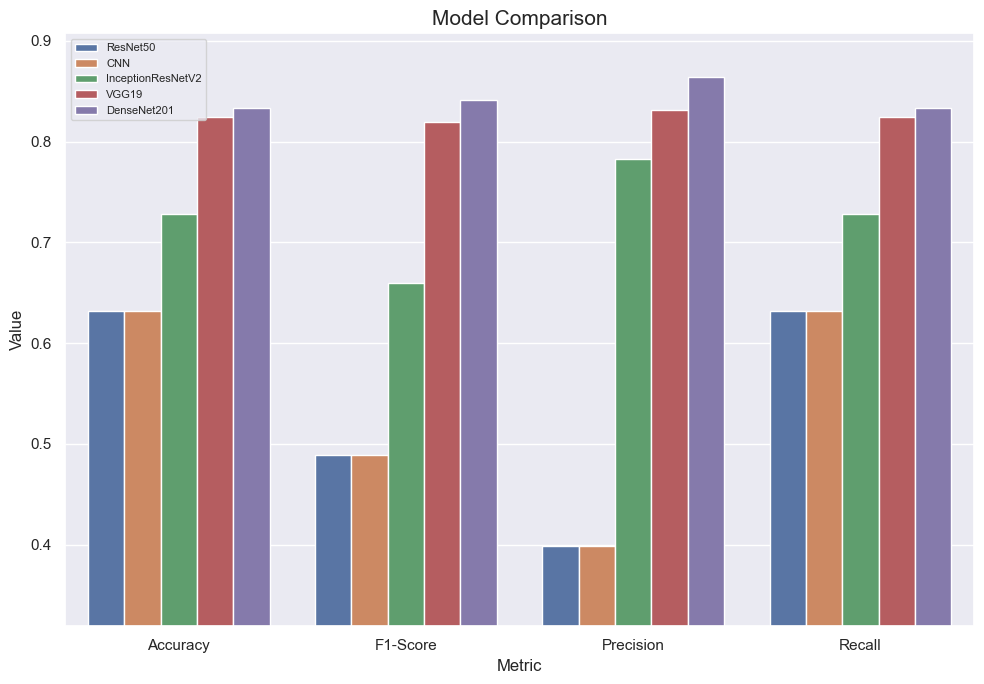

In [7]:
def plot_evaluation_comparison(eval_dic, metric_x='Metric', metric_hue='Model', dataset_name=None):
    """
    Plot a comparison of evaluation metrics for different models.

    Parameters:
    eval_dic (dict): Dictionary containing evaluation metrics for each model.
                     Format: {'model_name': {'metric_name': value, ...}, ...}
    metric_x (str): Column name to be used for x-axis in the plot. Default is 'Metric'.
    metric_hue (str): Column name to be used for hue (color) in the plot. Default is 'Model'.
    dataset_name (str, optional): Name of the dataset. Used for the plot title and file name.

    Returns:
    pd.DataFrame: DataFrame containing the evaluation metrics.
    """
    # Convert the dictionary to a pandas DataFrame
    eval_df = pd.DataFrame([[md, mt.title(), v] for md, dic in eval_dic.items() for mt, v in dic.items()],
                           columns=['Model', 'Metric', 'Value'])
    eval_df.sort_values(by=['Metric', 'Value'], inplace=True)
    eval_df.reset_index(drop=True, inplace=True)
    print(eval_df)
    
    # Plot the evaluation metrics
    plt.figure(figsize=(10, 7))
    sns.barplot(data=eval_df, x=metric_x, y='Value', hue=metric_hue)
    plt.title(f"Model Comparison", fontsize=15)
    plt.xticks(rotation=0)
    plt.ylim(eval_df['Value'].min() * 0.8, eval_df['Value'].max() * 1.05)
    plt.legend(loc=0, prop={'size': 8})
    plt.tight_layout()
    plt.savefig((f"{dataset_name} - " if dataset_name else '') + f"Comparison.jpg", dpi=300)
    plt.show()
    
    return eval_df

# Call the function to plot the evaluation comparison
eval_df = plot_evaluation_comparison(results,dataset_name='Fall Detection')